<a href="https://colab.research.google.com/github/paulrobustelli/python_demos/blob/main/Fit_POB_models_instructor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib as mpl # matplotlib library for plotting and visualization
import matplotlib.pylab as plt # matplotlib library for plotting and visualization
import numpy as np #numpy library for numerical manipulation, especially suited for data arrays
import warnings
import scipy, scipy.optimize
from mpl_toolkits.mplot3d import  Axes3D
from matplotlib import cm # to colormap 3D surfaces from blue to red

warnings.filterwarnings('ignore')


In [3]:
arr_2d = np.array([[29, 13], [13, 12]])
arr_2d

array([[29, 13],
       [13, 12]])

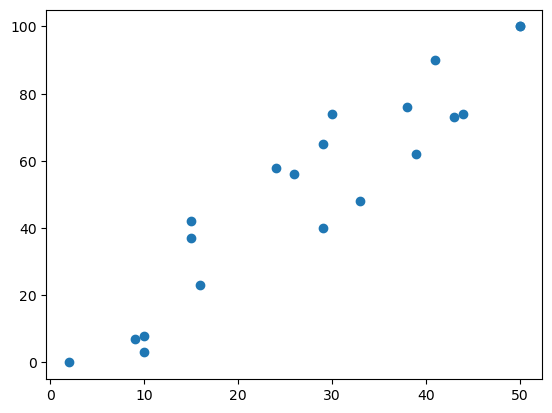

In [20]:
#Liner Regression Example: https://data36.com/linear-regression-in-python-numpy-polyfit/
#Here is some date we will use to illustrate how to perfrom a regression:

# x will usually be our timestep 
x_data=np.array([29, 9, 10, 38, 16, 26, 50, 10, 30, 33, 43, 2, 39, 15, 44, 29, 41, 15, 24, 50])
y_data=np.array([65, 7, 8, 76, 23, 56, 100, 3, 74, 48, 73, 0, 62, 37, 74, 40, 90, 42, 58, 100])
plt.scatter(x_data,y_data)
plt.show()

In [15]:
frame = np.arange(0,100)
# timestep of 2 femtoseconds  = 0.000002 nanonseconds 
time=frame*0.000002 # now we have our time in nanoseconds

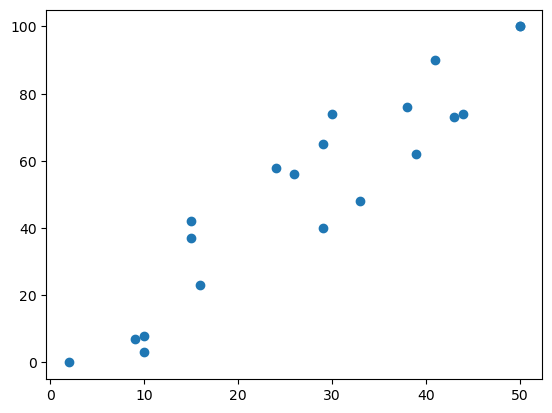

In [21]:
arr_2d = np.column_stack((x_data, y_data))
arr_2d.shape  
plt.scatter(arr_2d[:,0],arr_2d[:,1] )    

In [22]:
#The function line_fit takes x-data, y-data, and the degree of the polynomial you want to fit, and returns parameters
#degree 1 = line (a*x+b), 2 =(a*x^2+b*x+c), 3 = (a*x^3+b*x^2+c*x+d)
line_fit=np.polyfit(x_data,y_data,1)
#the function polyfit returns the coefficients for the polynomial you have just fit
#These coefficients are stored in array.  
#Here we print out all the items in the array
print(line_fit)
#This is the equation we have fit
print("y=a*x+b")
#Here we print each coeffiicent one at a time.  The a coefficient is stored 
#in the 0th position in our array of parameters, (line_fit[0])
print("a:",line_fit[0])
#The a coefficient is stored 
#The b coefficient is stored in the 1st position in our array of parameters, (line_fit[0])
print("b:",line_fit[1])


[ 2.01467487 -3.9057602 ]
y=a*x+b
a: 2.014674871440727
b: -3.9057601953360934


In [25]:
# We want to plot the line: y = 2.01467487 * x - 3.905760
# To do this, we need to create an array of x-value, that we will feed into out function to generate y-values
#We do this the funciton linspace, which will create an array of 51 values that span from 0 to 50 in an interval of 1:
x = np.linspace(0, 50, 51)
#lets look at our array.  We print the length of it, and then the values
print(len(x),x)
#Now lets use our coefficients from out linear fit to map the array of x-values on onto our line
y = line_fit[0]*x+line_fit[1]
print(y)

51 [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50.]
[-3.9057602  -1.89108532  0.12358955  2.13826442  4.15293929  6.16761416
  8.18228903 10.1969639  12.21163878 14.22631365 16.24098852 18.25566339
 20.27033826 22.28501313 24.299688   26.31436288 28.32903775 30.34371262
 32.35838749 34.37306236 36.38773723 38.4024121  40.41708698 42.43176185
 44.44643672 46.46111159 48.47578646 50.49046133 52.50513621 54.51981108
 56.53448595 58.54916082 60.56383569 62.57851056 64.59318543 66.60786031
 68.62253518 70.63721005 72.65188492 74.66655979 76.68123466 78.69590953
 80.71058441 82.72525928 84.73993415 86.75460902 88.76928389 90.78395876
 92.79863363 94.81330851 96.82798338]


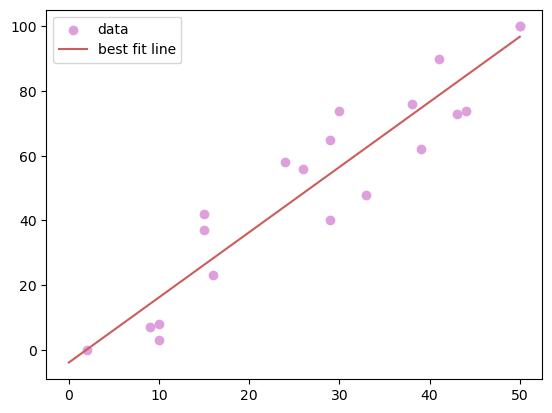

In [34]:
#Now we plot our data and our linear fit
plt.scatter(x_data,y_data,label='data', c="plum")
plt.plot(x,y,c='indianred',label='best fit line')
plt.legend()
#plt.xlim(0, 20)
#plt.ylim(0, 50)
plt.show()

Now lets calculate the correlation coefficien R^2

https://en.wikipedia.org/wiki/Coefficient_of_determination

We will first calculate the deviation of each data point from the average y-value Then we will square that deviation, and take the sum of all of the squared deviation

In [36]:
np.mean(arr_2d, axis=0)

array([27.65, 51.8 ])

In [37]:
#Calculate the mean
y_mean=np.mean(y_data)
print("Data Mean:",y_mean)
#Subtract the mean value from every data point in y 
y_deviation=y_data-y_mean
print(f'deviation: {y_deviation}')
#Now we square these deviations:
y_deviation_squared=y_deviation**2
print(f'square deviation: {y_deviation_squared}')

#Now we take the sum of the deviations squared: 
#"Total Sum of Squares":  SStot=Summation((y_i-y_ave)^2) for each element i in our dataset
SStot=np.sum(y_deviation_squared)
print("Sum of Squares of y-data:",SStot)

#We generate the y_values predicted by our model:
y_predict = line_fit[0]*x_data+line_fit[1]
#Now we calculate the sum of the squares of the residuals from out linear fit
#"Residual Sum of Squares": SS_residuals=Summation((y_pred_i-y_i)^2) for each element i in our dataset
SS_residuals=np.sum((y_predict-y_data)**2)
print("Sum of Squares of the Residuals:",SS_residuals)
#R^2 = 1 - SS_residuels/SS_total
R2= 1-SS_residuals/SStot
print("Correlation Coefficient:",R2)

Data Mean: 51.8
deviation: [ 13.2 -44.8 -43.8  24.2 -28.8   4.2  48.2 -48.8  22.2  -3.8  21.2 -51.8
  10.2 -14.8  22.2 -11.8  38.2  -9.8   6.2  48.2]
square deviation: [ 174.24 2007.04 1918.44  585.64  829.44   17.64 2323.24 2381.44  492.84
   14.44  449.44 2683.24  104.04  219.04  492.84  139.24 1459.24   96.04
   38.44 2323.24]
Sum of Squares of y-data: 18749.2
Sum of Squares of the Residuals: 2292.1268451492765
Correlation Coefficient: 0.8777480188408424


In [39]:
line_fit # a and b values 

array([ 2.01467487, -3.9057602 ])

In [38]:
# predicts a y value for a given a and b value from the line of best fit 
predict = np.poly1d(line_fit)
predict(4)

4.152939290426815

 
2.015 x - 3.906


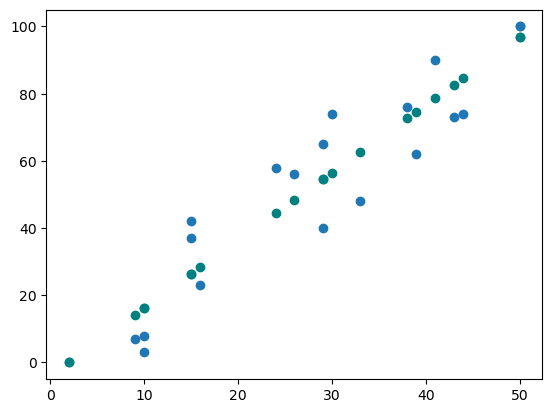

Correlation Coefficient: 0.8777480188408424


In [40]:
from sklearn.metrics import r2_score
#Now lets use a library to calculate the correlation efficient 
#make a function that is a first order polynomial to predict data based our linear fit
predict = np.poly1d(line_fit)
#This is our function
print(predict)
#generate the y values predicted by our linear-fit and plot them
y_predict=predict(x_data)
plt.scatter(x_data,y_data)
plt.scatter(x_data,y_predict,c='teal')
plt.show()

#Calculate the Correlation Coefficient with a built-in python function
correlation_coef=r2_score(y_data, predict(x_data))
print("Correlation Coefficient:",correlation_coef)

1st order poloynomial  
2.015 x - 3.906
Correlation Coefficient: 0.9819992319571398
2nd order poloynomial
          2
-0.01059 x + 2.588 x - 9.52
Correlation Coefficient: 0.9819992319571398
10th order poloynomial
            10             9             8            7            6
-9.814e-11 x  + 2.675e-08 x - 3.146e-06 x + 0.000209 x - 0.008633 x
           5         4         3         2
 + 0.2295 x - 3.932 x + 42.21 x - 264.8 x + 838.6 x - 899.5
Correlation Coefficient: 0.9819992319571398
20th order poloynomial
            20             19             18            17
-2.427e-23 x  + 5.422e-21 x  - 3.911e-19 x  + 2.52e-18 x 
              16            15             14             13
 + 7.901e-16 x  - 6.03e-15 x  - 1.868e-12 x  + 3.527e-12 x 
              12             11             10             9
 + 4.592e-09 x  - 7.136e-09 x  - 1.153e-05 x  + 0.0001987 x
            8         7         6         5            4             3
 + 0.02387 x - 1.607 x + 50.06 x - 951.1 x + 1.17e

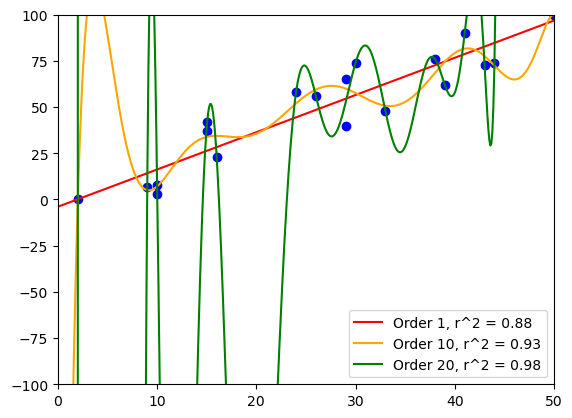

In [43]:
#Now lets fit some really high_order polynomials to our data for fun
# np.polyfit can be given the order polynomial to fit the data! :) 

# first order
line_fit=np.polyfit(x_data,y_data,1)
line_predict = np.poly1d(line_fit)
print("1st order poloynomial",line_predict)
correlation_coef1=r2_score(y_data, line_predict(x_data))
print("Correlation Coefficient:",correlation_coef)

# second order
poly_fit2=np.polyfit(x_data,y_data,2)
predict2 = np.poly1d(poly_fit2)
print("2nd order poloynomial")
print(predict2)
correlation_coef2=r2_score(y_data, predict2(x_data))
print("Correlation Coefficient:",correlation_coef)

# tenth order
poly_fit10=np.polyfit(x_data,y_data,10)
predict10 = np.poly1d(poly_fit10)
print("10th order poloynomial")
print(predict10)
correlation_coef10=r2_score(y_data, predict10(x_data))
print("Correlation Coefficient:",correlation_coef)

# twentieth order
poly_fit20=np.polyfit(x_data,y_data,20)
predict20 = np.poly1d(poly_fit20)
print("20th order poloynomial")
print(predict20)
correlation_coef20=r2_score(y_data, predict20(x_data))
print("Correlation Coefficient:",correlation_coef)

# span from 0 to 50, but make it finer with 500 points
x = np.linspace(0, 50, 500)

# the predictions
predict_y_1=line_predict(x)
predict_y_10=predict10(x)
predict_y_20=predict20(x)

# the original data 
plt.scatter(x_data,y_data,color='blue')

# now plot the fits
plt.plot(x,predict_y_1,c='r',label=f'Order 1, r^2 = {correlation_coef1:.2f}')
plt.plot(x,predict_y_10,c='orange',label=f'Order 10, r^2 = {correlation_coef10:.2f}')
plt.plot(x,predict_y_20,c='g',label=f'Order 20, r^2 = {correlation_coef20:.2f}')
plt.ylim(-100,100)
plt.xlim(0,50)
plt.legend()
plt.show()

Challenge: Can you fit a 3rd, 4th, and 5th order polynomial to our data, calculate the correlation coefficients and plot the results?

In [10]:
#Can you fit a 3rd, 4th, and 5th order polynomial to our data 
#calculate the correlation coefficients and plot the results?
x_data=np.array([29, 9, 10, 38, 16, 26, 50, 10, 30, 33, 43, 2, 39, 15, 44, 29, 41, 15, 24, 50])
y_data=np.array([65, 7, 8, 76, 23, 56, 100, 3, 74, 48, 73, 0, 62, 37, 74, 40, 90, 42, 58, 100])

####ADD YOUR CODE HERE######


Now we're going to introduce a function to calculate the Root Mean Squared Deviation (RMSD) of any given fit to a function to predict some data

https://en.wikipedia.org/wiki/Root-mean-square_deviation

In [44]:
def calculate_RMSD(y_data,y_predicted):
  # I fucking hate this shit :') 
  y_deviation=y_data-y_predicted
  N=len(y_data)
  y_deviation_squared=y_deviation**2
  RMSD=(np.sum(y_deviation_squared)/N)**0.5
  return RMSD 

In [45]:
predict_y_1=line_predict(x_data)
predict_y_10=predict10(x_data)
predict_y_20=predict20(x_data)

RMSD_1=calculate_RMSD(y_data,predict_y_1)
print("RMSD Linear Prediciton:",RMSD_1)
RMSD_10=calculate_RMSD(y_data,predict_y_10)
print("RMSD 10th order:",RMSD_10)
RMSD_20=calculate_RMSD(y_data,predict_y_20)
print("RMSD 20th order:",RMSD_20)

RMSD Linear Prediciton: 10.705435173661266
RMSD 10th order: 8.017759736206393
RMSD 20th order: 4.107919182440149


Polynomial Order: 0 RMSD: 30.617968580557395
Polynomial Order: 1 RMSD: 10.705435173661268
Polynomial Order: 2 RMSD: 10.526719040716268
Polynomial Order: 3 RMSD: 10.304609011605834
Polynomial Order: 4 RMSD: 9.531426702062195
Polynomial Order: 5 RMSD: 9.043833856461204
Polynomial Order: 6 RMSD: 8.883249989222
Polynomial Order: 7 RMSD: 8.639972018251921
Polynomial Order: 8 RMSD: 8.341021188125795
Polynomial Order: 9 RMSD: 8.15109942826472
Polynomial Order: 10 RMSD: 8.017759736932064
Polynomial Order: 11 RMSD: 7.81431533365748
Polynomial Order: 12 RMSD: 7.075713121708565
Polynomial Order: 13 RMSD: 6.922663690299228
Polynomial Order: 14 RMSD: 6.795283157175443
Polynomial Order: 15 RMSD: 4.108433534971835
Polynomial Order: 16 RMSD: 4.107920749153612
Polynomial Order: 17 RMSD: 4.107919251612028
Polynomial Order: 18 RMSD: 4.107919475825729
Polynomial Order: 19 RMSD: 4.10791922265642
Polynomial Order: 20 RMSD: 4.107919206424454


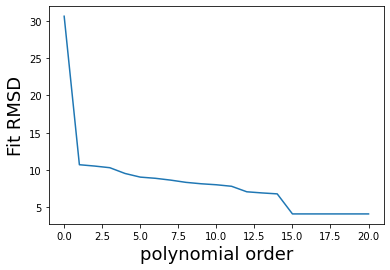

In [13]:
#Not lets make a loop to check the fit of a bunch of polynomials

#Make some empty lists to starte our RMSD values in for plotting
polynomial_order=[]
polynomial_rmsd=[]

for i in range(21):
  # fit a polynomial 
  poly_fit=np.polyfit(x_data,y_data,i)
  # predict line of best fit 
  predict = np.poly1d(poly_fit)
  y_predict=predict(x_data)
  # find RMSD
  RMSD=calculate_RMSD(y_data,y_predict)
  # add it back to the list we made! 
  polynomial_order.append(i)
  polynomial_rmsd.append(RMSD)
  print("Polynomial Order:",i,"RMSD:",RMSD)

# Then! Let's make a plot! 
plt.plot(polynomial_order,polynomial_rmsd)
plt.xlabel('polynomial order',size=18)
plt.ylabel('Fit RMSD',size=18)

plt.show()

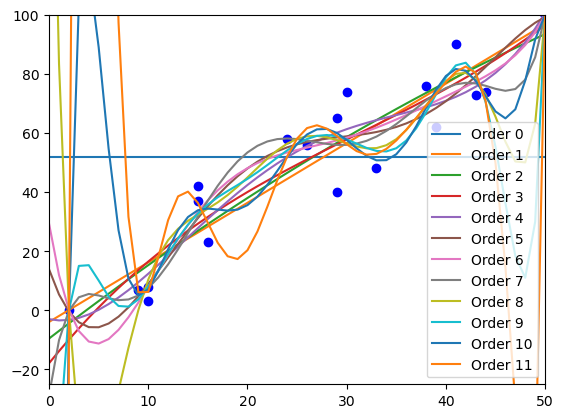

In [50]:
#We can also use a loop to plot these functions

x = np.linspace(0, 50, 51)
plt.scatter(x_data,y_data,color='blue')

for i in range(12): # fucking gross
  poly_fit=np.polyfit(x_data,y_data,i)
  predict = np.poly1d(poly_fit)
  y_predict=predict(x)
  label='order %s'%i
  #RMSD=calculate_RMSD(y_data,y_predict)
  plt.plot(x,y_predict,label='Order %s'%i)    
  #print("Polynomial Order:",i,"RMSD:",RMSD)
plt.ylim(-25,100)
plt.xlim(0,50)    
plt.legend()
plt.show()

Remember the Particle Box?  Now lets use some of the tools we've developed to determine the Particle in a Box Wavefunction parameters n+L for some data of particle position distributions

In [15]:
#Define Psi=((2/L)^(1/2))*sin(n*pi/L)

def psi(x,n,L): 
  return np.sqrt(2.0/L)*np.sin(float(n)*np.pi*x/L)

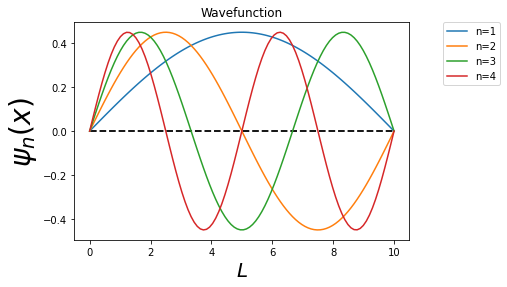

In [16]:
#Lets Plot Some Wavefunctions with a loop:   
#n = 1
#Lengh of Box in Angstroms
L=10
x = np.linspace(0,L,100)
# Adding a horizontal line at 0
plt.hlines(0.0, 0.0, L, linewidth=1.8, linestyle='--', color="black") 

for n in range(1,5):
  plt.plot(x,psi(x,n,L),label='n=%s'%n)


plt.legend(loc=2);
plt.xlabel(r'$L$',size=20)
plt.ylabel(r'$\psi_n(x)$',size=28)
plt.title('Wavefunction')
plt.legend(bbox_to_anchor=(1.1, 1), loc=2, borderaxespad=0.0)
plt.show()

Can you make a small modification to this loop above to plot the probability density?

In [17]:
L=10
x = np.linspace(0,L,100)
# Adding a horizontal line at 0
plt.hlines(0.0, 0.0, L, linewidth=1.8, linestyle='--', color="black") 

for n in range(1,5):
  #ADD NEW CODE HERE#

  #plt.plot(x,psi(x,n,L),label='n=%s'%n)


plt.legend(loc=2);
plt.xlabel(r'$L$',size=20)
plt.ylabel(r'$|\psi_n(x)|^2$',size=28)
plt.title('Probability Density')
plt.legend(bbox_to_anchor=(1.1, 1), loc=2, borderaxespad=0.0)
plt.show()

IndentationError: ignored

In [18]:
#We're going to make a distribution of particle position observations using magic statistics
#functions to draw random numbers from a definied probability distribution
import scipy.stats as st

def psi(x,n,L): 
  return np.sqrt(2.0/L)*np.sin(float(n)*np.pi*x/L)

#class my_pdf(st.rv_continuous):
#    def _pdf(self,x):
#        return psi(x,n,L)**2  # Normalized over its range, in this case [0,1]
#x = np.linspace(0, L, 100)
#n=2
#L=10
#POB_position_generator= my_pdf(a=0, b=L, name='POB_distribution')

def exp_measurement_generator(n_exp,L_exp):
 x = np.linspace(0, L, 100)
 class my_pdf(st.rv_continuous):
    def _pdf(self,x):
     return psi(x,n_exp,L_exp)**2  # Normalized over its range, in this case [0,1]
 POB_position_generator= my_pdf(a=0, b=L_exp, name='POB_distribution')
 return POB_position_generator

[2.07057536 2.02081476 5.61104067 1.19925923 2.65294252 7.00670228
 7.3999723  3.98930154 1.27648936 6.81591313 3.03687181 7.41636842
 2.88737698 8.25145185 3.80966325 4.08747443 3.91831218 2.7335062
 3.52368581 2.99438325 3.58198602 1.14031777 8.60066082 6.31651769
 6.77856002 3.0618793  1.88950654 7.53871152 2.31716705 8.38949347
 7.75736962 2.52202454 6.93199364 1.09242105 2.20124549 8.06197915
 2.11498354 7.97822642 6.27804879 8.11916121 6.23167675 2.78702003
 2.67227943 1.55453839 8.78931278 7.18196529 8.94897632 6.32054731
 3.2742063  1.25312613]


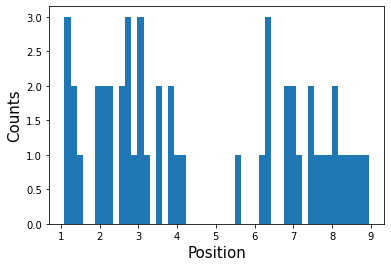

In [19]:
x = np.linspace(0, L, 100)
n_exp=2
L_exp=10
data_generator=exp_measurement_generator(n_exp,L_exp)
#Genearte Particle in a Box Position Measurements
POB_positions=data_generator.rvs(size=50)
#Lets see what positions were generated
print(POB_positions)

#now we'll plot a histogram of these positions
hist=plt.hist(POB_positions,bins=50)
plt.xlabel('Position',size=15)
plt.ylabel('Counts',size=15)
plt.show()

Now we're going to converte the histogram into a normalized probability density
Where instead of counts and bin widths or x values are the histogram bin center
And the y values are the fraction of the counts observed in that bin


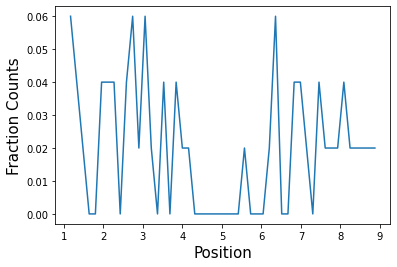

In [20]:
counts=hist[0]
counts_norm=counts/np.sum(counts)
bin_edges=hist[1]
bin_centers = bin_edges[:-1] + np.diff(bin_edges)/2
plt.plot(bin_centers,counts_norm)
plt.xlabel('Position',size=15)
plt.ylabel('Fraction Counts',size=15)
plt.show()

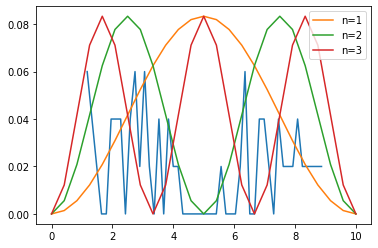

In [21]:
#Lets check the visual agreement between this data and different POB probability density predictions
#based on this number of observations?

plt.plot(bin_centers,counts_norm)
L=10
x = np.linspace(0, L, 25)

for n in range(1,4):
  psi_prob_norm=psi(x,n,L)**2/np.sum(psi(x,n,L)**2)
  plt.plot(x,psi_prob_norm,label='n=%s'%n)
plt.legend()

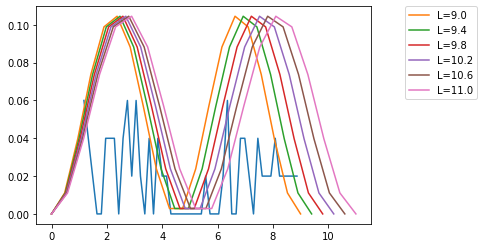

In [22]:
#Lets see if we can discriminate L for a given n
x = np.linspace(0,L,25)
plt.plot(bin_centers,counts_norm)

n=2
L_values=np.linspace(9,11,6)
for L in L_values:
  x = np.linspace(0, L, 20)
  psi_prob_norm=psi(x,n,L)**2/np.sum(psi(x,n,L)**2)
  plt.plot(x,psi_prob_norm,label='L=%s'%L)

plt.legend(bbox_to_anchor=(1.1, 1), loc=2, borderaxespad=0.0)
plt.show()

Text(0, 0.5, 'Counts')

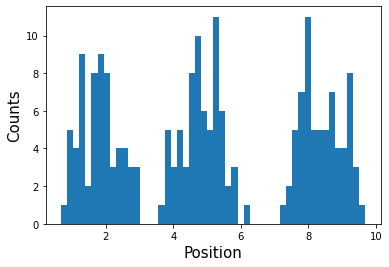

In [23]:
#Lets Try with More Observations:

n_exp=3
L_exp=10
data_generator=exp_measurement_generator(n_exp,L_exp)
#Genearte Particle in a Box Position Measurements
POB_positions=data_generator.rvs(size=200)

#now we'll plot a histogram of these positions
POB_position_hist=plt.hist(POB_positions,bins=50)
plt.xlabel('Position',size=15)
plt.ylabel('Counts',size=15)

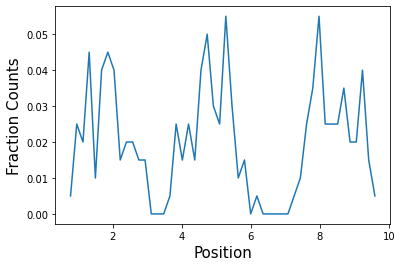

In [24]:
counts=POB_position_hist[0]
counts_norm=counts/np.sum(counts)
bin_edges=POB_position_hist[1]
bin_centers = bin_edges[:-1] + np.diff(bin_edges)/2
plt.plot(bin_centers,counts_norm)
plt.xlabel('Position',size=15)
plt.ylabel('Fraction Counts',size=15)
plt.show()

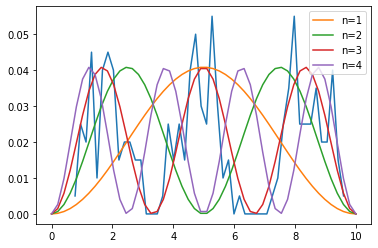

In [25]:
#Now Lets try some fits to this data

L=10
x = np.linspace(0, L, 50)

plt.plot(bin_centers,counts_norm)
for n in range(1,5):
  psi_prob_norm=psi(x,n,L)**2/np.sum(psi(x,n,L)**2)
  plt.plot(x,psi_prob_norm,label='n=%s'%n)
plt.legend()

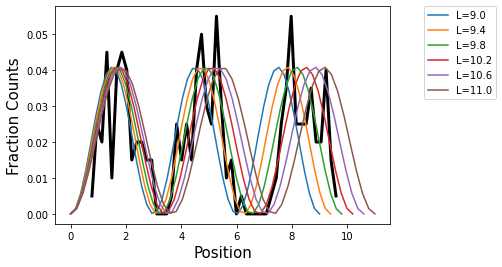

In [26]:
#Can we determine L now from the data?
plt.plot(bin_centers,counts_norm,c='black',linewidth=3)

L_values=np.linspace(9,11,6)
n=3
for L in L_values:
  x = np.linspace(0, L, 50)
  psi_prob_norm=psi(x,n,L)**2/np.sum(psi(x,n,L)**2)
  plt.plot(x,psi_prob_norm,label='L=%s'%L)

plt.legend(bbox_to_anchor=(1.1, 1), loc=2, borderaxespad=0.0)
plt.xlabel('Position',size=15)
plt.ylabel('Fraction Counts',size=15)
plt.show()

L: 9.0 POB Model RMSD: 0.02442950024351581
L: 9.8 POB Model RMSD: 0.022225646232430916
L: 10.6 POB Model RMSD: 0.019787179222246976
L: 11.4 POB Model RMSD: 0.018695632857391082
L: 12.2 POB Model RMSD: 0.018528007879471956
L: 13.0 POB Model RMSD: 0.01880657657318001


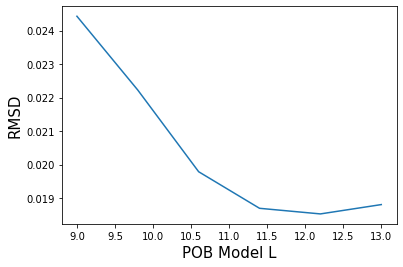

In [27]:
#Now Lets Write a function to determine the agreement for a given POB model with our data
def calculate_RMSD(y_data,y_predicted):
  y_deviation=y_data-y_predicted
  N=len(y_data)
  y_deviation_squared=y_deviation**2
  RMSD=(np.sum(y_deviation_squared)/N)**0.5
  return RMSD 

#Our x-values will be the bin centers and y-values the normalized counts
x_exp=bin_centers
y_exp=counts_norm

L_values=np.linspace(9,13,6)
n=2
Model_L=[]
Model_RMSD=[]
for L in L_values:
  psi_prob_norm=psi(x_exp,n,L)**2/np.sum(psi(x_exp,n,L)**2)
  #plt.plot(x,psi_prob_norm,label='L=%s'%L)
  RMSD=calculate_RMSD(y_exp,psi_prob_norm)
  print("L:",L,"POB Model RMSD:",RMSD)
  Model_L.append(L)
  Model_RMSD.append(RMSD)

plt.plot(Model_L,Model_RMSD)
plt.xlabel('POB Model L',size=15)
plt.ylabel('RMSD',size=15)
plt.show()


L: 10 n: 1 POB Model RMSD: 0.021101242581481
L: 10 n: 2 POB Model RMSD: 0.021518910319732312
L: 10 n: 3 POB Model RMSD: 0.009973682331669214
L: 10 n: 4 POB Model RMSD: 0.02239203150956137
L: 10 n: 5 POB Model RMSD: 0.02159584184407612
L: 10 n: 6 POB Model RMSD: 0.021317931563395034
L: 10 n: 7 POB Model RMSD: 0.019833804818654484


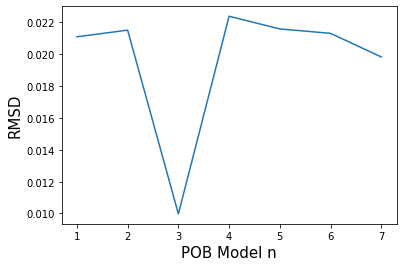

In [28]:
#Now Lets vary N:
#Our x-values will be the bin centers and y-values the normalized counts
x_exp=bin_centers
y_exp=counts_norm

L=10
n=2

Model_n=[]
Model_RMSD=[]

for n in range(1,8):
  psi_prob_norm=psi(x_exp,n,L)**2/np.sum(psi(x_exp,n,L)**2)
  #plt.plot(x,psi_prob_norm,label='L=%s'%L)
  RMSD=calculate_RMSD(y_exp,psi_prob_norm)
  print("L:",L,"n:",n,"POB Model RMSD:",RMSD)
  Model_n.append(n)
  Model_RMSD.append(RMSD)
    
plt.plot(Model_n,Model_RMSD)
plt.xlabel('POB Model n',size=15)
plt.ylabel('RMSD',size=15)
plt.show()

Now, lets say we have a new distribution of POB particle observations in 1D, can you determine the most likely values of L and n for these obesrvations

Can you Plot a few of the most plausible wave functions for particle position observations?

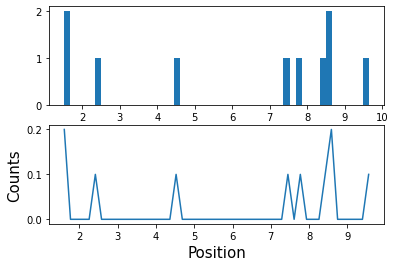

In [29]:
#Experimental Dataset 1
x = np.linspace(0, L, 100)
n_exp=10
L_exp=10
data_generator=exp_measurement_generator(n_exp,L_exp)
#Genearte Particle in a Box Position Measurements
POB_positions_set1=data_generator.rvs(size=10)
#Lets see what positions were generated

#now we'll plot a histogram of these positions
fig,ax = plt.subplots(2)
position_hist_1=ax[0].hist(POB_positions_set1,bins=50)
plt.xlabel('Position',size=15)
plt.ylabel('Counts',size=15)

counts=position_hist_1[0]
counts_norm_1=counts/np.sum(counts)
bin_edges=position_hist_1[1]
bin_centers_1 = bin_edges[:-1] + np.diff(bin_edges)/2
ax[1].plot(bin_centers_1,counts_norm_1)
plt.show()

L: 10 n: 1 POB Model RMSD: 0.05335416947302937
L: 10 n: 2 POB Model RMSD: 0.049355539613344185
L: 10 n: 3 POB Model RMSD: 0.04713425547835066
L: 10 n: 4 POB Model RMSD: 0.050771988808662676
L: 10 n: 5 POB Model RMSD: 0.05198844949655948
L: 10 n: 6 POB Model RMSD: 0.05206252102422376
L: 10 n: 7 POB Model RMSD: 0.053524458163423876
L: 10 n: 8 POB Model RMSD: 0.05230412267248746
L: 10 n: 9 POB Model RMSD: 0.04973101487979763
L: 10 n: 10 POB Model RMSD: 0.044599881325270714
L: 10 n: 11 POB Model RMSD: 0.048659345990690155
L: 10 n: 12 POB Model RMSD: 0.05208917845281596
L: 10 n: 13 POB Model RMSD: 0.054519219358586335
L: 10 n: 14 POB Model RMSD: 0.051097850335183825
L: 10 n: 15 POB Model RMSD: 0.0494322777619525
L: 10 n: 16 POB Model RMSD: 0.048881181237891765
L: 10 n: 17 POB Model RMSD: 0.049130710906056044
L: 10 n: 18 POB Model RMSD: 0.05147923733934922
L: 10 n: 19 POB Model RMSD: 0.05237724055082996


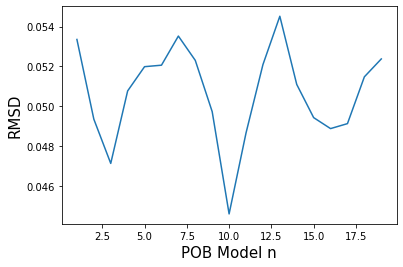

In [30]:
x_exp=bin_centers_1
y_exp=counts_norm_1

L=10

Model_n=[]
Model_RMSD=[]

for n in range(1,20):
  psi_prob_norm=psi(x_exp,n,L)**2/np.sum(psi(x_exp,n,L)**2)
  #plt.plot(x,psi_prob_norm,label='L=%s'%L)
  RMSD=calculate_RMSD(y_exp,psi_prob_norm)
  print("L:",L,"n:",n,"POB Model RMSD:",RMSD)
  Model_n.append(n)
  Model_RMSD.append(RMSD)
    
plt.plot(Model_n,Model_RMSD)
plt.xlabel('POB Model n',size=15)
plt.ylabel('RMSD',size=15)
plt.show()

n: 10 L: 8.0 POB Model RMSD: 0.05214389362100537
n: 10 L: 8.210526315789474 POB Model RMSD: 0.05041260358187229
n: 10 L: 8.421052631578947 POB Model RMSD: 0.05364647726076561
n: 10 L: 8.631578947368421 POB Model RMSD: 0.05457774122643778
n: 10 L: 8.842105263157894 POB Model RMSD: 0.05059443102557113
n: 10 L: 9.052631578947368 POB Model RMSD: 0.04846075778915161
n: 10 L: 9.263157894736842 POB Model RMSD: 0.05105306762068783
n: 10 L: 9.473684210526315 POB Model RMSD: 0.053207255189656286
n: 10 L: 9.68421052631579 POB Model RMSD: 0.050667456878237406
n: 10 L: 9.894736842105264 POB Model RMSD: 0.04604690237183386
n: 10 L: 10.105263157894736 POB Model RMSD: 0.04435925864315915
n: 10 L: 10.31578947368421 POB Model RMSD: 0.04733556593303568
n: 10 L: 10.526315789473685 POB Model RMSD: 0.051493975355423945
n: 10 L: 10.736842105263158 POB Model RMSD: 0.05299580515070646
n: 10 L: 10.947368421052632 POB Model RMSD: 0.05161976353309772
n: 10 L: 11.157894736842106 POB Model RMSD: 0.04922053374344139

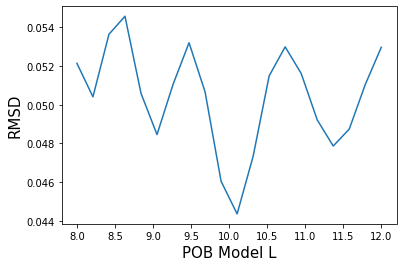

In [31]:
#Our x-values will be the bin centers and y-values the normalized counts
x_exp=bin_centers_1
y_exp=counts_norm_1

L_values=np.linspace(8,12,20)
n=10
Model_L=[]
Model_RMSD=[]
for L in L_values:
  psi_prob_norm=psi(x_exp,n,L)**2/np.sum(psi(x_exp,n,L)**2)
  #plt.plot(x,psi_prob_norm,label='L=%s'%L)
  RMSD=calculate_RMSD(y_exp,psi_prob_norm)
  print("n:",n,"L:",L,"POB Model RMSD:",RMSD)
  Model_L.append(L)
  Model_RMSD.append(RMSD)

plt.plot(Model_L,Model_RMSD)
plt.xlabel('POB Model L',size=15)
plt.ylabel('RMSD',size=15)
plt.show()


n: 3 L: 8.0 POB Model RMSD: 0.0511259580745073
n: 3 L: 8.210526315789474 POB Model RMSD: 0.05093237666481745
n: 3 L: 8.421052631578947 POB Model RMSD: 0.050486326622841735
n: 3 L: 8.631578947368421 POB Model RMSD: 0.04987247967110313
n: 3 L: 8.842105263157894 POB Model RMSD: 0.04918939294806407
n: 3 L: 9.052631578947368 POB Model RMSD: 0.048511322034390694
n: 3 L: 9.263157894736842 POB Model RMSD: 0.047899357341780434
n: 3 L: 9.473684210526315 POB Model RMSD: 0.04741986377141178
n: 3 L: 9.68421052631579 POB Model RMSD: 0.047134662933033214
n: 3 L: 9.894736842105264 POB Model RMSD: 0.04707747833266593
n: 3 L: 10.105263157894736 POB Model RMSD: 0.04724345232226906
n: 3 L: 10.31578947368421 POB Model RMSD: 0.04759680555043786
n: 3 L: 10.526315789473685 POB Model RMSD: 0.04808634635374458
n: 3 L: 10.736842105263158 POB Model RMSD: 0.04865912754817747
n: 3 L: 10.947368421052632 POB Model RMSD: 0.04926864139222898
n: 3 L: 11.157894736842106 POB Model RMSD: 0.049878051493079334
n: 3 L: 11.368

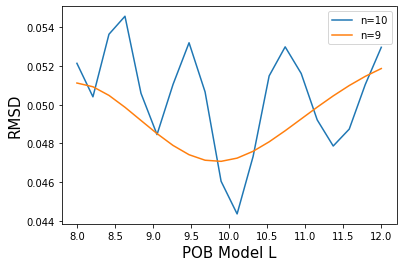

In [32]:
#Our x-values will be the bin centers and y-values the normalized counts
x_exp=bin_centers_1
y_exp=counts_norm_1

L_values=np.linspace(8,12,20)
n=3
Model_L2=[]
Model_RMSD2=[]
for L in L_values:
  psi_prob_norm=psi(x_exp,n,L)**2/np.sum(psi(x_exp,n,L)**2)
  #plt.plot(x,psi_prob_norm,label='L=%s'%L)
  RMSD=calculate_RMSD(y_exp,psi_prob_norm)
  print("n:",n,"L:",L,"POB Model RMSD:",RMSD)
  Model_L2.append(L)
  Model_RMSD2.append(RMSD)

plt.plot(Model_L,Model_RMSD,label='n=10')
plt.plot(Model_L2,Model_RMSD2,label='n=9')
plt.xlabel('POB Model L',size=15)
plt.ylabel('RMSD',size=15)
plt.legend()
plt.show()

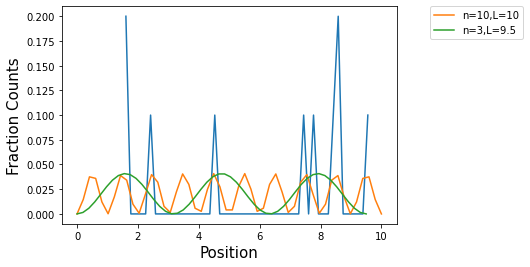

In [38]:
plt.plot(bin_centers_1,counts_norm_1)

n=10
L=10
x_plot=np.linspace(0, L, 50)
x_plot=np.linspace(0, L, 50)
prob_density1=psi(x_plot,n,L)**2
prob_density1_norm=psi(x_plot,n,L)**2/np.sum(psi(x_plot,n,L)**2)
plt.plot(x_plot,prob_density1_norm,label='n=10,L=10')

n=3
L=9.5
x_plot=np.linspace(0, L, 50)
prob_density2=psi(x_plot,n,L)**2
prob_density2_norm=psi(x_plot,n,L)**2/np.sum(psi(x_plot,n,L)**2)
plt.plot(x_plot,prob_density2_norm,label='n=3,L=9.5')

plt.legend(bbox_to_anchor=(1.1, 1), loc=2, borderaxespad=0.0)
plt.xlabel('Position',size=15)
plt.ylabel('Fraction Counts',size=15)
plt.show()
plt.show()